# Predictions of Chronic Kidney Disease

## Abstract
Chronic Kidney Disease (CKD) is a common illness that often goes undetected before medical intervention has started, early detection is a critical component for patient outcome/longevity, this would consist of one or more of the following: prescription medication, dialysis or a kidney transplant, and a change in lifestyle factors. As the symptoms of CKD can be quite broad, variable and minor (to start with), people do not often approach the doctors or other medical practitioners early enough. It is startling to consider that people can lose up to 90% of their kidney function before they start to display symptoms, and by that time they could be in end stage renal failure (ESRF) which is fatal without a dialysis or transplant (dialysis may only delay it). In this work we are going to analyze if we can predict CKD or not using Data Science methods. Also, try to figure out early predictions before doing dialysis in CKD patients. If we can achieve these two results, we will be able to give nephrologists a gap time to research the causes of the disease, depending on each patient. In addition, the doctor could give the patient some advice to attempt to minimize the disease and extend the time before having to undergo dialysis or even a kidney transplant. In this particular assignment, we have only 400 patient data. Hence, we have to manage every data carefully. It means that when we clean some data, it will be important to take into account the original data, depending on the case. Our main null hypothesis is whether we can predict CKD without blood creatinine values. Moreover, we are going to find out what features of laboratory results are relevant to be considered a CKD. Additionally, considering the patient ages of data as a timeline of a CKD, we will estimate the time to be exposed to a dialysis. For these, we are going to explore the data, clean and figure out data models to achieve our objectives. 

## Introduction
Chronic Kidney Disease (CKD) is a long-term condition where the kidneys progressively lose their ability to function properly over time. The primary function of the kidneys is to filter waste and excess fluids from the blood, which are then excreted as urine. When the kidneys are damaged or impaired, waste products can build up in the body, leading to various complications.<br />
<br />
Causes of Chronic Kidney Disease:

+ Diabetes: High blood sugar levels can damage the blood vessels in the kidneys.
+ Hypertension (High Blood Pressure): Prolonged high blood pressure puts a strain on the kidneys, leading to damage over time.
+ Glomerulonephritis: Inflammation of the kidney's filtering units (glomeruli).
+ Polycystic Kidney Disease: A genetic disorder where cysts form in the kidneys, leading to kidney enlargement and impaired function.
+ Kidney infections or urinary tract obstructions.
<br />

Symptoms of Chronic Kidney Disease:<br />
In the early stages, CKD may not present noticeable symptoms. As the disease progresses, the following symptoms may develop:

+ Fatigue and weakness
+ Swelling (edema) in the ankles, feet, or hands
+ Shortness of breath
+ Increased or decreased urination
+ Blood in the urine
+ Foamy or bubbly urine
+ Nausea and vomiting
+ Loss of appetite
+ Sleep disturbances
+ Muscle cramps
<br />

Treatment and Management:
+ Treatment for CKD aims to slow down the progression of the disease, manage symptoms, and reduce the risk of complications. Depending on the stage of CKD and its underlying cause, management may involve:

+ Lifestyle changes: Including a healthy diet, regular exercise, quitting smoking, and limiting alcohol intake.
+ Medications: To control blood pressure, manage diabetes, treat anemia, and address other complications.
+ Dialysis: For advanced stages of CKD, where the kidneys can no longer adequately filter the blood.
+ Kidney transplant: In cases of end-stage kidney disease, a kidney transplant may be considered as a treatment option.
<br />

It's important for individuals at risk of CKD to undergo regular health check-ups and screenings to detect the condition early and manage it effectively. If you suspect you may have kidney problems or are at risk of CKD, it's essential to consult a healthcare professional for proper evaluation and guidance.


## Phases to be analysed by data science
1. Aim definition
2. Commercial context (Understand the problem)
3. Business problem
4. Analytical context (Data extraction)
5. Data Exploration (EDA)
    a. Data Preprosation <br />
    b. Data cleaning <br />
    c. Data integration <br />
    d. Data transformation <br />
    e. Data reduction <br />
    f. Data discretization <br />
6. Data engineering
7. Suitable algorithm selection<br />
    Model: Supervised learning<br />
     - Regression
     - Classification: decision trees, logistic regression, KNN
8. Algorithm development (Model validation, Model Deployment)
9. Interpretation
10. Conclusions

### 1. Aim definition

Our main goal is identify CKD pattron before have to undergo dialysis or even a kidney transplant. Hence nephrologe can intervene and attend it earlier and provide a better life to the patient.

### 2. Commercial context (Understand the problem) - [Pan American Health Organization and World Health Organization][1]

Chronic Kidney Disease (CKD) is a significant global health issue, and its prevalence has been increasing over the years. The exact number of people with CKD can vary depending on the region, population demographics, and risk factors. However, We can find some general statistics available up to 2021:<br />

+ According to the World Health Organization (WHO), CKD affects approximately 10% of the world's population. This estimate translates to hundreds of millions of people worldwide.
+ In the United States, the Centers for Disease Control and Prevention (CDC) reported that about 15% of adults (around 37 million people) have CKD.
+ In some high-risk populations, such as individuals with diabetes or hypertension, the prevalence of CKD can be much higher. In some regions, up to 40% of people with diabetes may also have CKD.
+ CKD is more common in older age groups, and as the global population ages, the burden of CKD is expected to increase.

It's essential to note that these statistics are based on data available up to 2021, and the numbers may have changed since then due to changes in risk factors, improved detection and diagnosis, and changes in population demographics. For the most recent and accurate data on the prevalence of CKD, it is best to refer to updated reports from reputable health organizations and government agencies.

[1]: https://www.paho.org/en/enlace/burden-kidney-diseases

### 3. Business problem
Are there particular patterns in CKD patients among all patients? <br />
What are the features that help us to identify CKD patients?

### 4. Analytical context (Data extraction)
I found only one [CKD dataset][1] with some features that could give us some relevant information about CKD. The dimensions of the source are 26 attributes and 400 observations. The attributes are predominantly blood test indicators, with other biometric data. Therefore, as we have a small sample of data, we have to manage carefully.

[1]: https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv

In [1]:
# Import every library to be use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv"
ckd_df = pd.read_csv(url, index_col=False)
# As well as ID is the same numbering, It is changed the id column to 'index'.
ckd_df.set_index('id', inplace=True)
ckd_df.info()
ckd_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Data Set Information
We use the following representation to collect the dataset <br />
age - age: 
    This is the age of the participant that was included in the dataset.  <br />
bp - blood pressure: 90-120/60-80mm Hg (systolic/diastolic)<br />
sg - specific gravity: 1.005 to 1.030<br />
al - albumin: normal range 3.5g/dL - 5g/dL <br />
su - sugar: normal range 0 - 0.8mmol/L<br />
rbc - red blood cells: 'normal' or 'abnormal'.<br />
pc - pus cell: 'normal' or 'abnormal'.<br />
pcc - pus cell clumps: 'present' or 'notpresent'<br />
ba - bacteria: 'pus cells clumps' and 'pus cells'<br />
bgr - blood glucose random: 200mg/dL or higher are diagnostic of diabetes<br />
bu - blood urea: normal range 7mg/dL - 20mg/dL<br />
sc - serum creatinine: Normal range for adult men is 0.74 to 1.35 mg/dL, and adult women 0.59 to 1.04 mg/dL<br />
sod - sodium: normal range in the blood is between 135 and 145 milliequivalents per liter (mEQ/L)<br />
pot - potassium: normal range in the blood is between 3.7 and 5.2 milliequivalents per liter (mEQ/L)<br />
hemo - hemoglobin: normal range in the blood is: adult men 13.6 – 17.7 gm/dL, and adult women 12.1 – 15.1 gm/dL<br />
pcv - packed cell volume: normal range is: adult men 40.7-50.3%, and adult women 36.1 to 44.3%<br />
wc - white blood cell count: normal range is approximately 4,500-10,000 white blood cells per mm3<br />
rc - red blood cell count: The normal range is, adult men 4.3-5.9 million/mm3 and adult women 3.5-5.5 million/mm3<br />
htn - hypertension: 'yes' or 'no'<br />
dm - diabetes mellitus: 'yes' or 'no'<br />
cad - coronary artery disease: 'yes' or 'no'<br />
appet - appetite: 'good' or 'poor' <br />
pe - pedal edema: 'yes' or 'no'<br />
ane - anemia: 'yes' or 'no' <br />
class - classification: 'ckd' or 'notckd' <br />

In [3]:
# rename features (more descriptive)
columns_description = ['age','blood pressure','specific gravity','albumin','sugar',
       'red blood cells','pus cell','pus cell clumps','bacteria',
       'blood glucose random','blood urea','serum creatinine',
       'sodium','potassium','hemoglobin','packed cell volume',
       'white blood cell count','red blood cell count','hypertension',
       'diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','classification']
ckd_df.columns = columns_description
ckd_df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
ckd_df.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


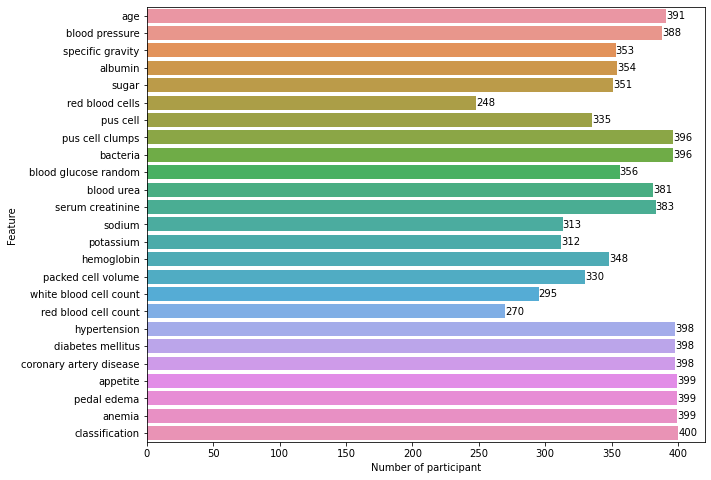

In [5]:
# Plot count of participant without NaN
def plot_count_by_feature(data_df):
    tmp_df = pd.DataFrame(data_df.count()).set_axis(['Number of participant'], axis=1)
    tmp_df.reset_index(inplace=True)
    tmp_df.rename(columns = {'index':'Feature'}, inplace = True)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='Number of participant', y='Feature', data=tmp_df)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
plot_count_by_feature(ckd_df)

Looking this figure, we can verify quickly which feature has NaN. It means that there are particupants with less data than others.
Thus, in next section we are going to try to fix this essue.

c:\Users\ANA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


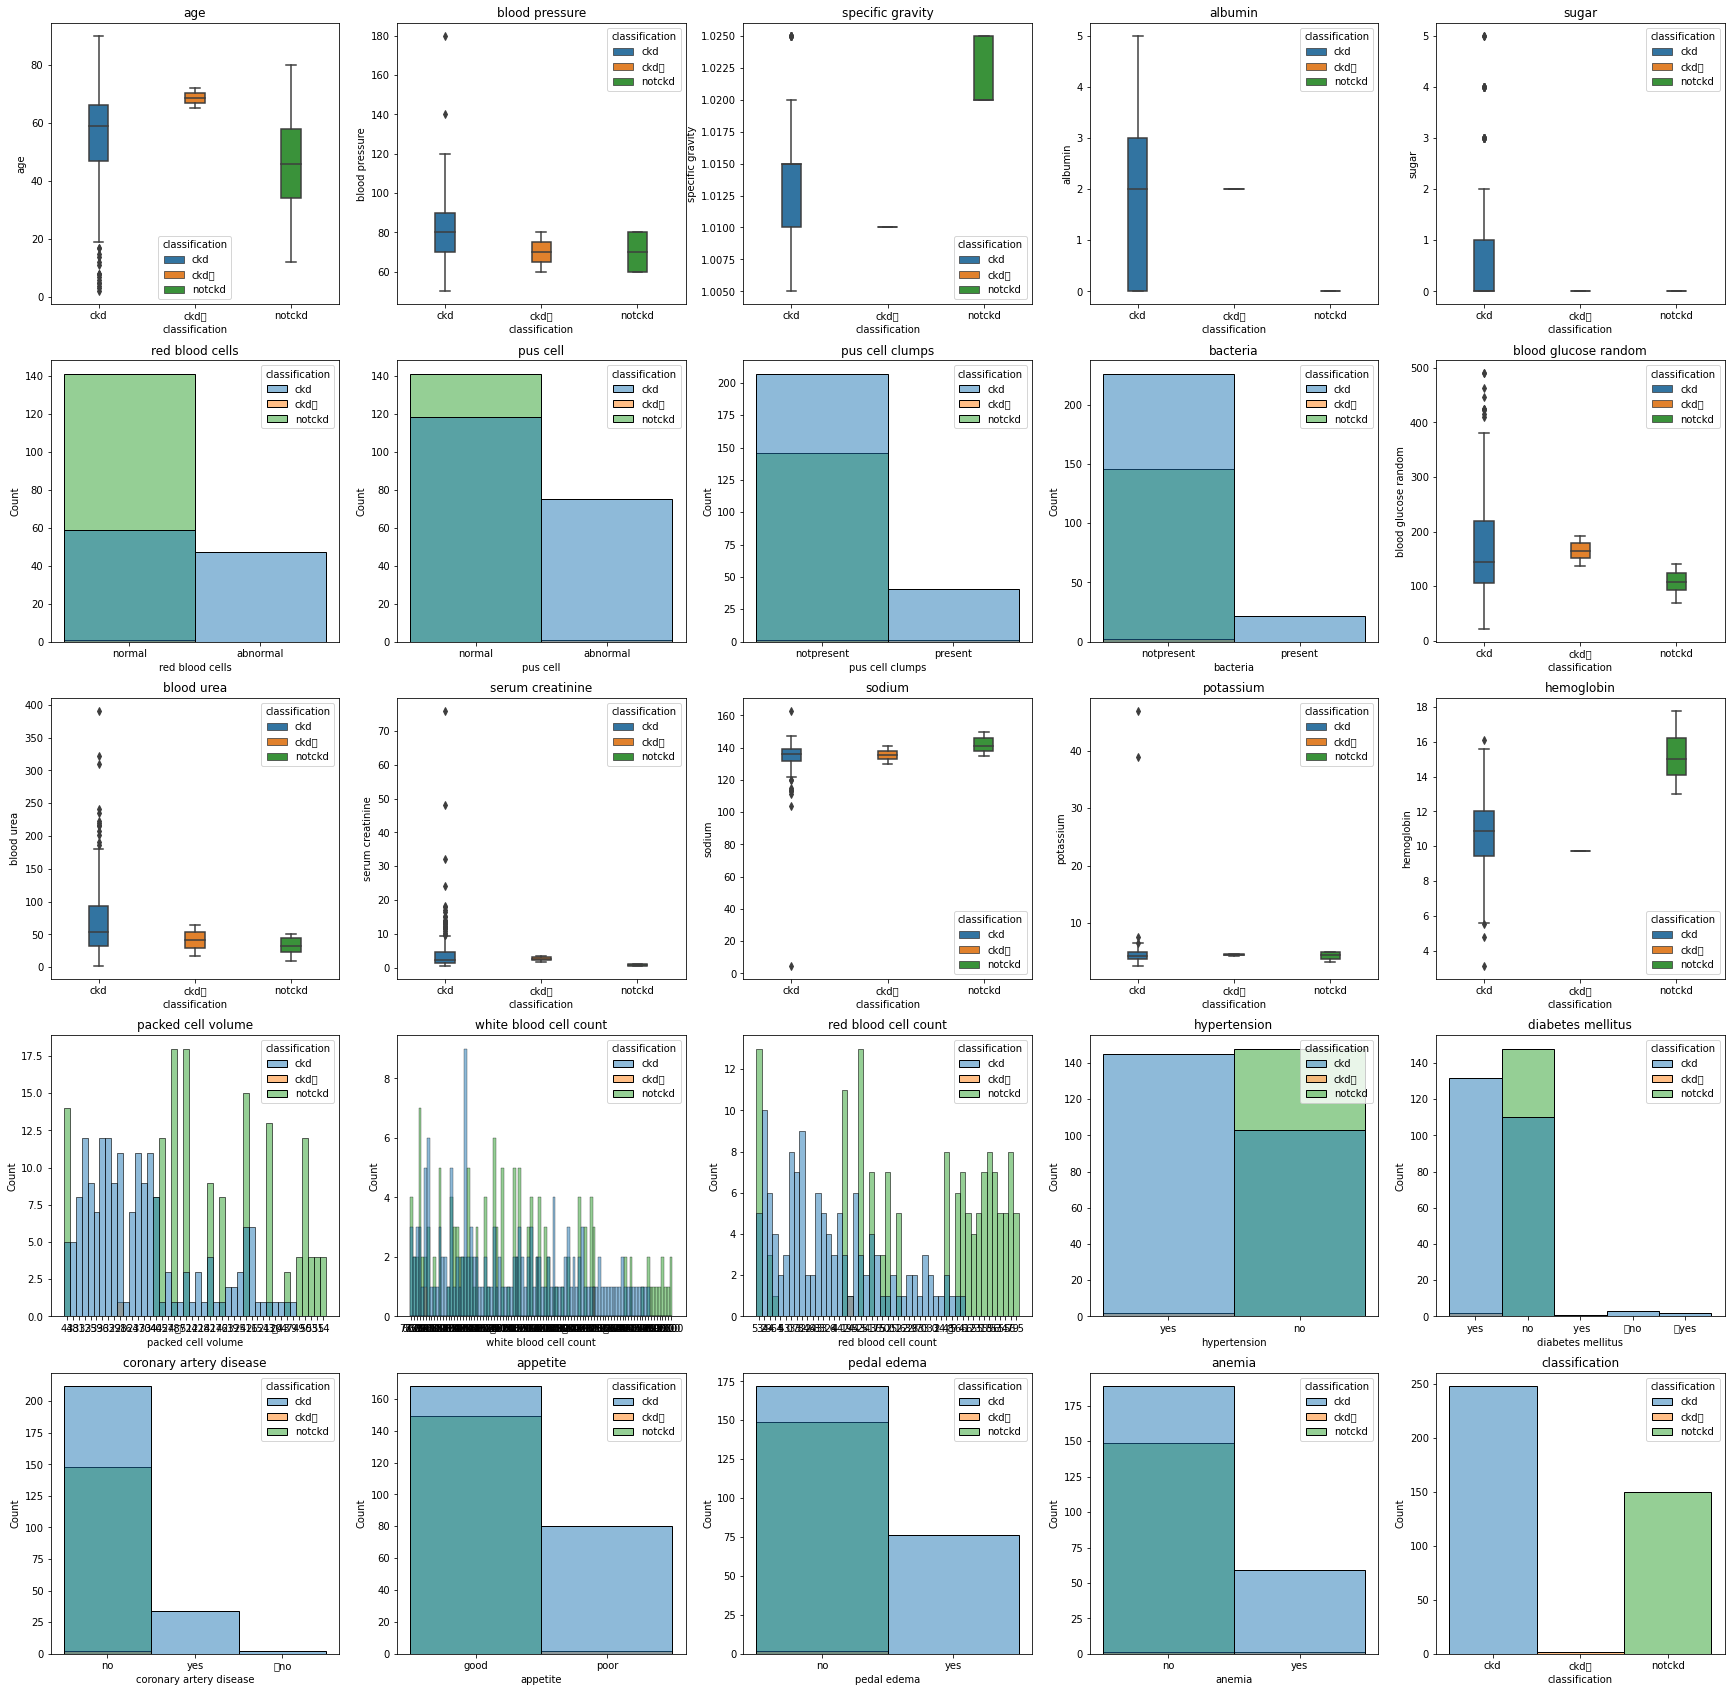

In [6]:
def plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows):
    fig, axs = plt.subplots(n_plot_rows, n_plot_columns, figsize=(30, 30))
    i_row    = 0
    i_column = 0
    for i in ckd_df.columns:
        # print()
        # # print(i_row,i_column)
        if ckd_df[i].dtype != object:
            sns.boxplot(x='classification',y=i, hue = 'classification', data=ckd_df, width=0.2, dodge=False, ax=axs[i_row,i_column])
            axs[i_row,i_column].set_title(i)
        else:
            axs[i_row,i_column].set_title(i)
            sns.histplot(data=ckd_df, x=i, hue="classification", ax=axs[i_row,i_column])
            # axs[i_row,i_column].tick_params(axis='x', rotation=90)
        if i_column < n_plot_columns-1: 
            i_column += 1
        elif i_column == n_plot_columns-1:
            i_column = 0
            if i_row < n_plot_rows:
                i_row += 1

n_plot_columns = 5
n_plot_rows    = math.ceil(ckd_df.shape[1]/n_plot_columns)
plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows)

It is possible look that there some data need to preproces, clean, integrate, etc. Hence, we are going to explore our date and adapt it as well as workable. For example, there are feature that it is number value but it is assigned as string object. Also, there are string object with the same name, however it has other letter (like square).

### 5. Data Exploration (EDA)
    - Data preprocessing
    - Data cleaning 
    - Data integration 
    - Data transformation 
    - Data reduction 
    - Data discretization 

In [7]:
# Convert variables to the appropriate type
ckd_df['red blood cell count'] = pd.to_numeric(ckd_df['red blood cell count'], errors='coerce')
ckd_df['white blood cell count'] = pd.to_numeric(ckd_df['white blood cell count'], errors='coerce')
ckd_df['packed cell volume'] = pd.to_numeric(ckd_df['packed cell volume'], errors='coerce')

# Group categorical variables together in a list
cat_var = [var for var in ckd_df.columns if ckd_df[var].dtype == 'object']
num_var = [var for var in ckd_df.columns if ckd_df[var].dtype == 'float64']

# Use for loop to assess unique values and identify typos

for var in cat_var:
    print(f"{var} contains the following unique values: {ckd_df[var].unique()}")

# Fix errors in 'diabetes_mellitus'
ckd_df['diabetes mellitus'] = ckd_df['diabetes mellitus'].str.strip()
ckd_df['diabetes mellitus'].replace({'/tno','/tyes'}, {'no','yes'}, inplace = True)
ckd_df['diabetes mellitus'].value_counts()

# Fix errors in 'coronary_artery_disease'
ckd_df['coronary artery disease'].replace('\tno', 'no', inplace = True)
ckd_df['coronary artery disease'].value_counts()

# Fix errors in 'classification'
ckd_df['classification'].replace('ckd_df\t', 'ckd_df', inplace = True)
ckd_df['classification'].value_counts()

def impute_randomsample(variable):
    randomsample = ckd_df[variable].dropna().sample(ckd_df[variable].isna().sum())
    randomsample.index = ckd_df[ckd_df[variable].isnull()].index
    ckd_df.loc[ckd_df[variable].isnull(), variable] = randomsample   

for var in cat_var:
    impute_randomsample(var)
    
for var in num_var:
   impute_randomsample(var)

red blood cells contains the following unique values: [nan 'normal' 'abnormal']
pus cell contains the following unique values: ['normal' 'abnormal' nan]
pus cell clumps contains the following unique values: ['notpresent' 'present' nan]
bacteria contains the following unique values: ['notpresent' 'present' nan]
hypertension contains the following unique values: ['yes' 'no' nan]
diabetes mellitus contains the following unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary artery disease contains the following unique values: ['no' 'yes' '\tno' nan]
appetite contains the following unique values: ['good' 'poor' nan]
pedal edema contains the following unique values: ['no' 'yes' nan]
anemia contains the following unique values: ['no' 'yes' nan]
classification contains the following unique values: ['ckd' 'ckd\t' 'notckd']


age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64


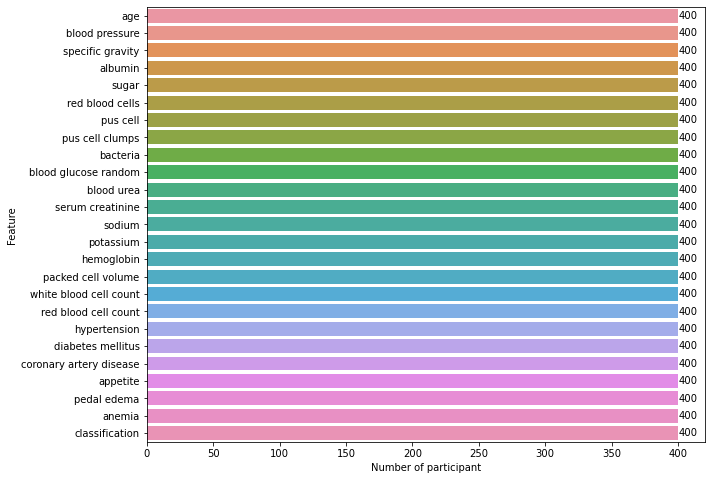

In [8]:
nan_value = ckd_df.isnull().sum()
print(nan_value)
plot_count_by_feature(ckd_df)

In [9]:
ckd_df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [10]:
ckd_df['classification'].replace(to_replace='ckd\t', value='ckd', inplace=True)
ckd_df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

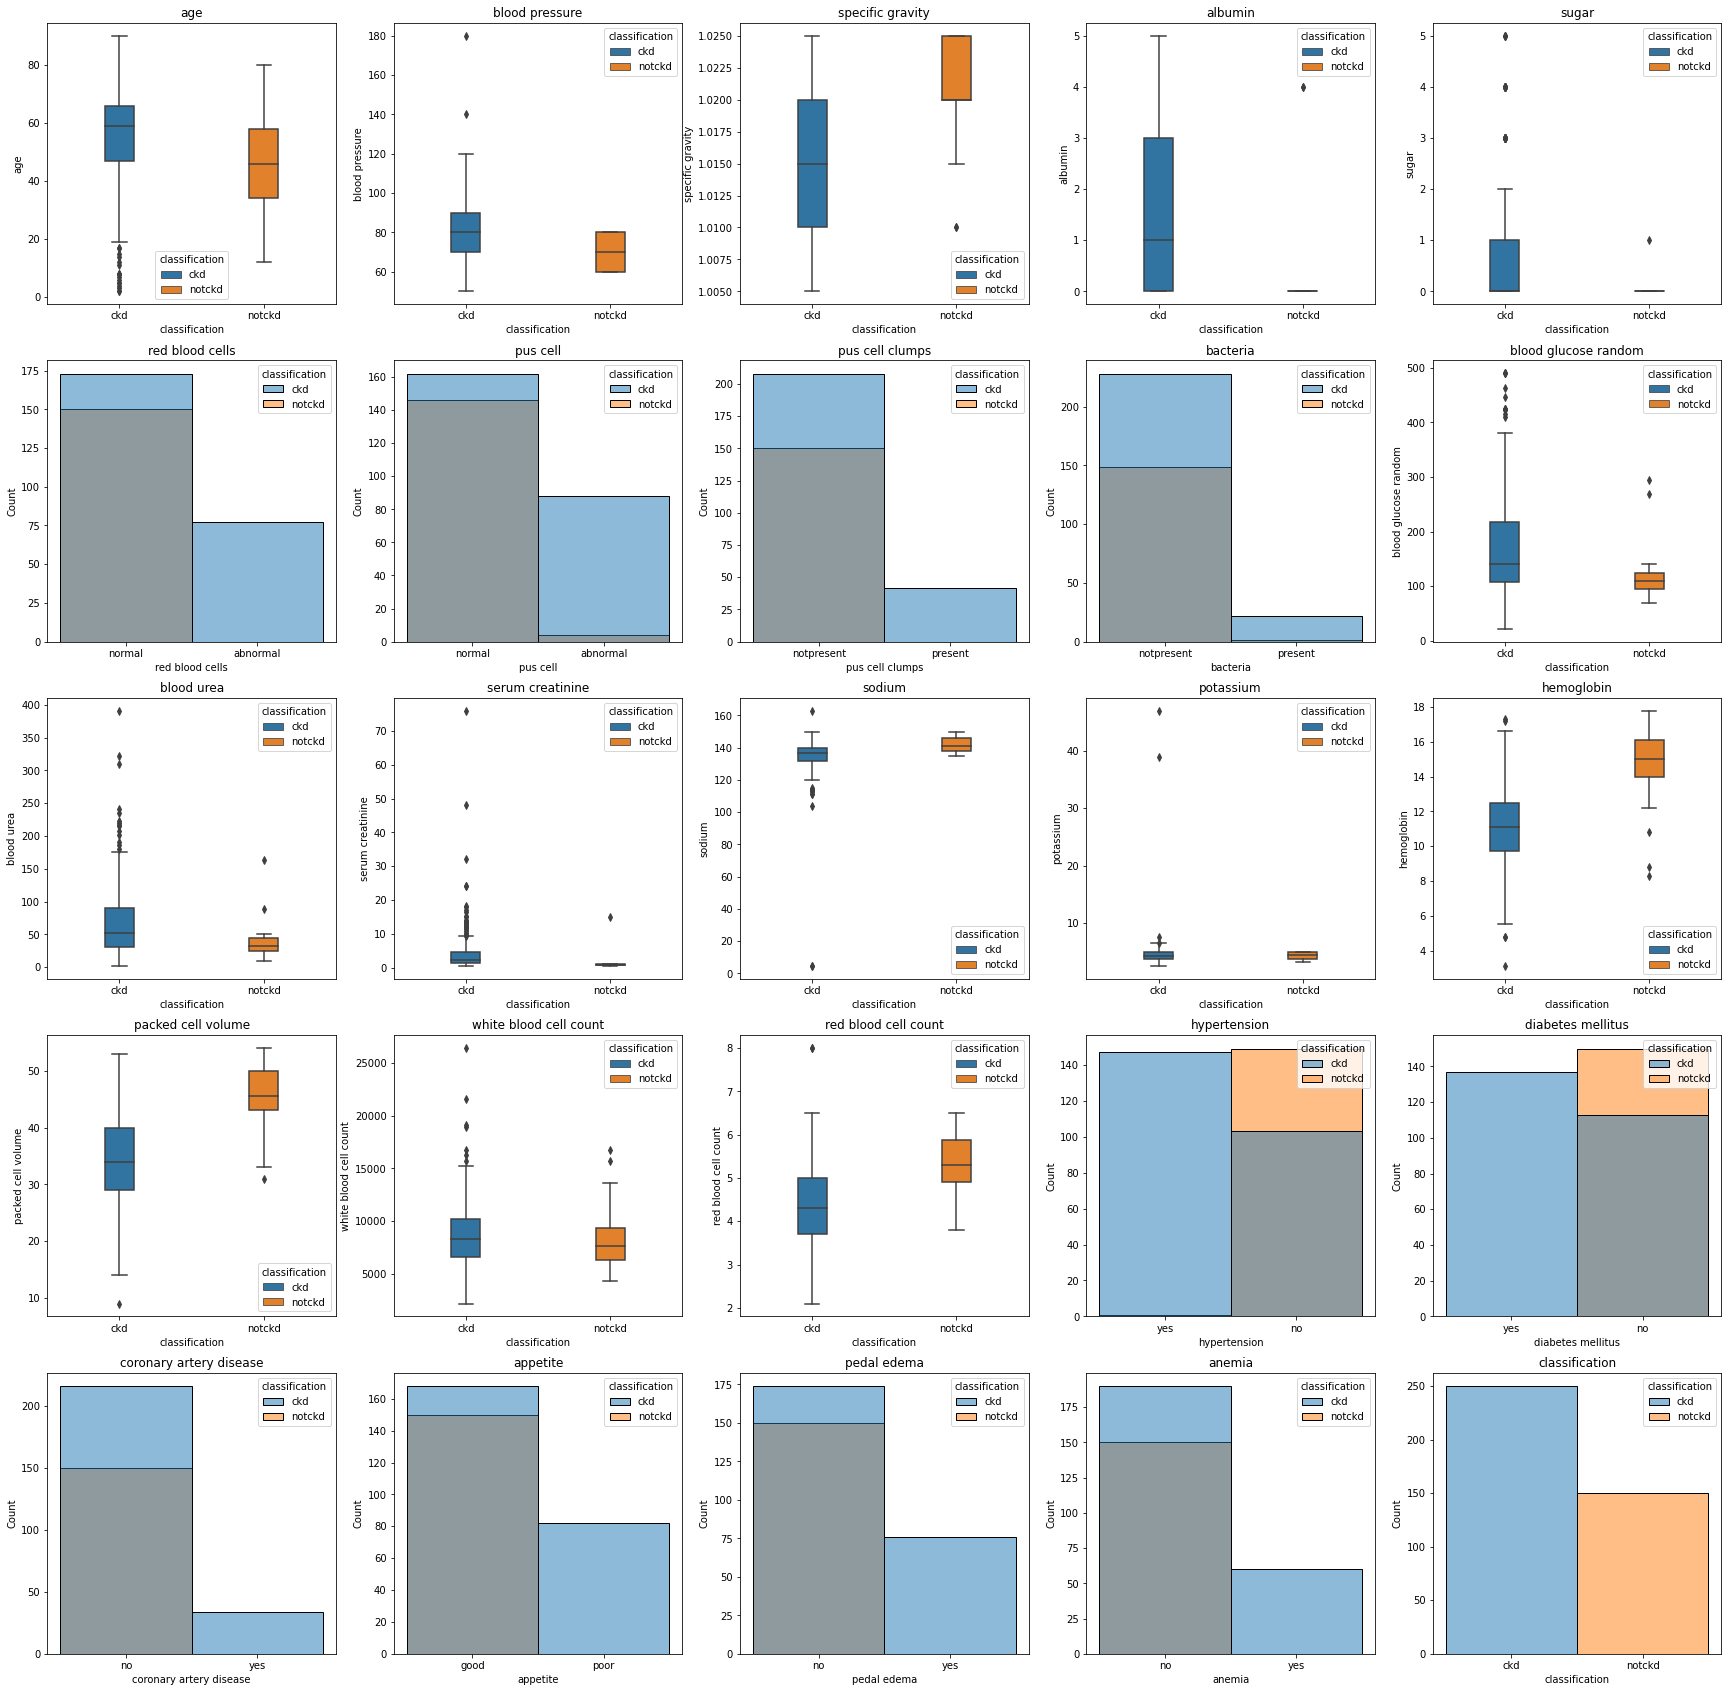

In [22]:
plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows)

In [11]:
ckd_age = ckd_df[ckd_df['classification']=='ckd']['age']
ckd_filled_df = ckd_df
if ckd_age.isnull().sum() > 0: # If there is any CKD patient without age assignation, it will fill with the average of CKD patient ages.
    ckd_age_mean = ckd_df[ckd_df['age']!=pd.NA]['age'].mean()
    ckd_filled_df['age'].fillna(ckd_age_mean)


Text(0.5, 0.98, 'Chronic Kidney Disease - CKD\nCKD classification, Serum creatinine, Sodium')

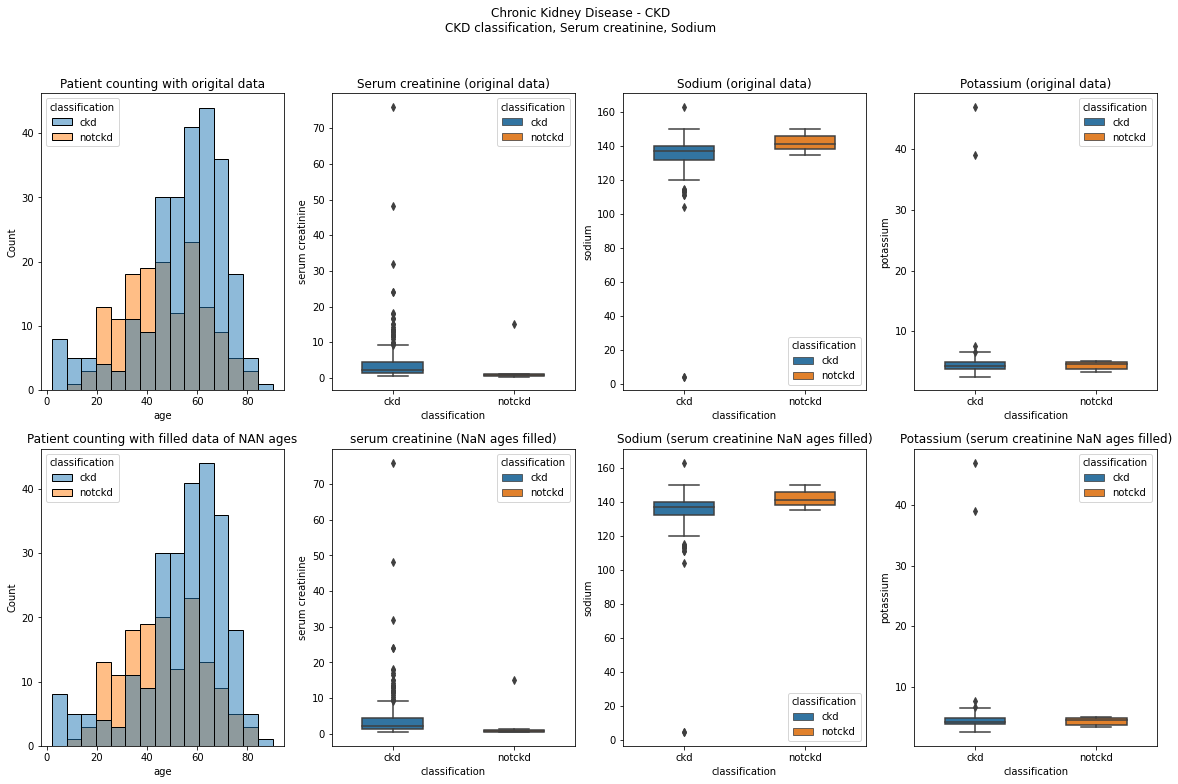

In [12]:
fig, axs = plt.subplots(2,4,figsize=(20, 12))
axs[0,0].set_title('Patient counting with origital data')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data of NAN ages')
sns.histplot(data=ckd_filled_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('serum creatinine (NaN ages filled)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_filled_df, width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_filled_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_filled_df, width=0.5, dodge=False, ax=axs[1,3])


fig.suptitle("Chronic Kidney Disease - CKD\nCKD classification, Serum creatinine, Sodium")

It is possible to check that by replacing NaN value of ages for mean ages, it doesn't modify the main feature of the data frame.
However, we can verify that there is some outline data of “serum creatinine” (main value to be observed for CKD), “sodium” and "potassium". Hence, we have to remove it from our data frame and review if there is another outline data. 

In [13]:
# Value of quartils
Q1_sc  = ckd_filled_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_filled_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")

Q1_sod  = ckd_filled_df['sodium'].quantile(0.25)
Q3_sod  = ckd_filled_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")

Q1_pot  = ckd_filled_df['potassium'].quantile(0.25)
Q3_pot  = ckd_filled_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")

SERUM CREATININE
Q1_sc:0.9	 Q3_sc:2.8	 IQR_sc:1.9
SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
POTASSIUM:
Q1_pot:3.775	 Q3_pot:4.9	 IQR_pot:1.1250000000000004


In [14]:
# Clean outlines 
ckd_cleaned_df = ckd_filled_df[ckd_filled_df['serum creatinine']> (Q1_sc - 1.5*IQR_sc)]
ckd_cleaned_df = ckd_filled_df[ckd_filled_df['serum creatinine']< (Q3_sc + 1.5*IQR_sc)]

ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['sodium']> (Q1_sod - 1.5*IQR_sod)]
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['sodium']< (Q3_sod + 1.5*IQR_sod)]

ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']< (Q3_pot + 1.5*IQR_pot)]

Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

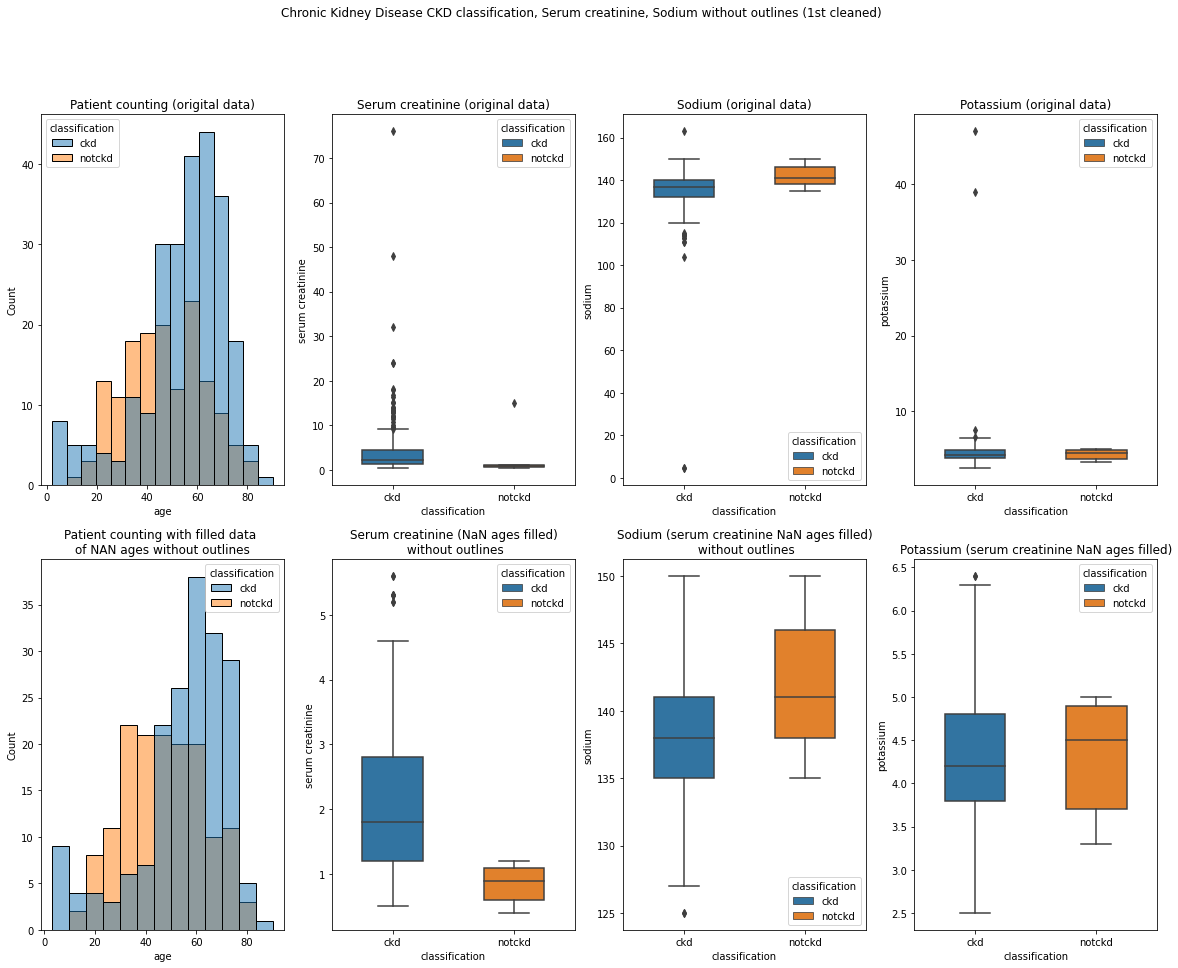

In [15]:
# Verify outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
sns.histplot(data=ckd_cleaned_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_cleaned_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

In [16]:
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_cleaned_df = ckd_cleaned_df[ckd_cleaned_df['potassium']< (Q3_pot + 1.2*IQR_pot)]

Q1_pot  = ckd_cleaned_df['potassium'].quantile(0.25)
Q3_pot  = ckd_cleaned_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")

POTASSIUM:
Q1_pot:3.7	 Q3_pot:4.9	 IQR_pot:1.2000000000000002


Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

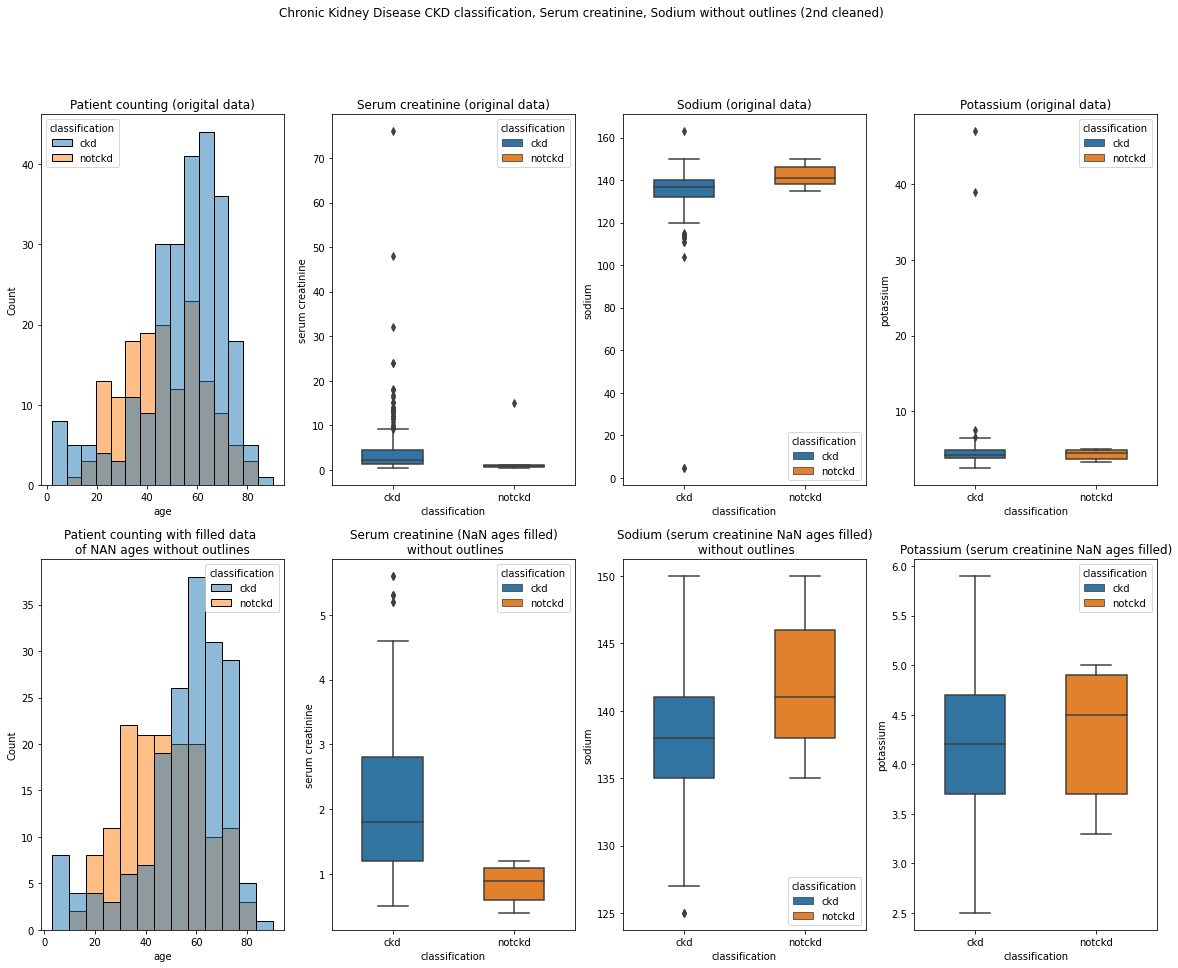

In [17]:
# Verify (2nd) outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
sns.histplot(data=ckd_cleaned_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_cleaned_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_cleaned_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

Watching these figures, we have to take into account that it loses data when we clean it.

In [19]:
# Resulting values of quartils
print("Resulting values of quartils")
Q1_sc  = ckd_filled_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_filled_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")
print(f"Lower sc inliner: {Q1_sc - 1.5*IQR_sc} \nUpper sc inliner: {Q3_sc + 1.5*IQR_sc}\n")

Q1_sod  = ckd_filled_df['sodium'].quantile(0.25)
Q3_sod  = ckd_filled_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")
print(f"Lower sod inliner: {Q1_sod - 1.5*IQR_sod} \nUpper sod inliner: {Q3_sod + 1.5*IQR_sod}\n")

Q1_pot  = ckd_cleaned_df['potassium'].quantile(0.25)
Q3_pot  = ckd_cleaned_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")
print(f"Lower sod inliner: {Q1_pot - 1.5*IQR_pot} \nUpper sod inliner: {Q3_pot + 1.2*IQR_pot}\n")

Resulting values of quartils
SERUM CREATININE
Q1_sc:0.9	 Q3_sc:2.8	 IQR_sc:1.9
Lower sc inliner: -1.9499999999999997 
Upper sc inliner: 5.6499999999999995

SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
Lower sod inliner: 124.5 
Upper sod inliner: 152.5

POTASSIUM:
Q1_pot:3.7	 Q3_pot:4.9	 IQR_pot:1.2000000000000002
Lower sod inliner: 1.9 
Upper sod inliner: 6.340000000000001



We are going to analysis relation "Serum creatinine" and "Sodium" who has "anemia" and hypertension.

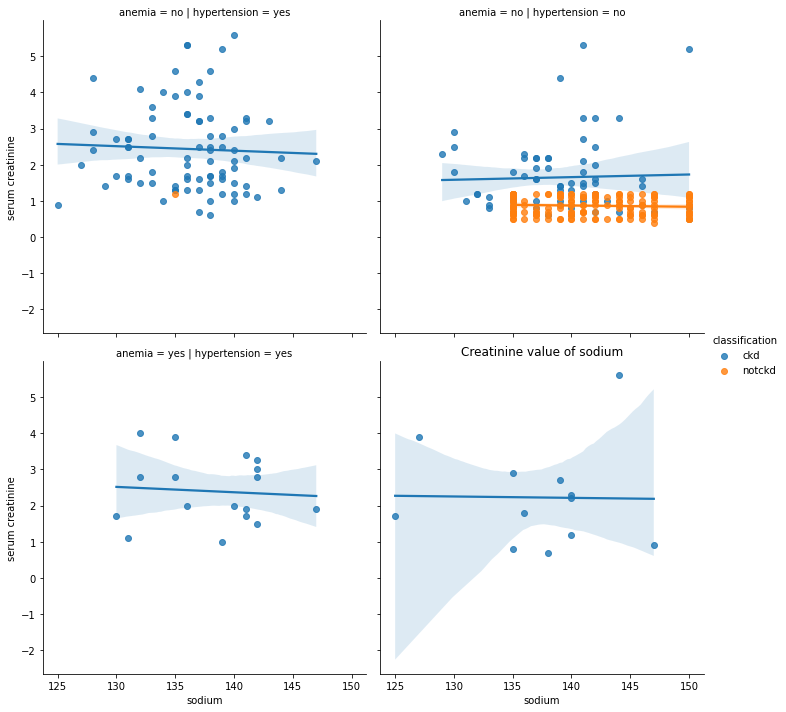

In [20]:
sns.lmplot(x="sodium", y="serum creatinine", hue="classification", col="hypertension", row="anemia", data=ckd_cleaned_df)
ax = plt.gca()
ax.set_title("Creatinine value of sodium")
plt.show()

It is possible prove that people who doesn't have anemia and hypertension are not CKD.

Now, we are goint to plot serum creatinine with ages, sodium and potassium.

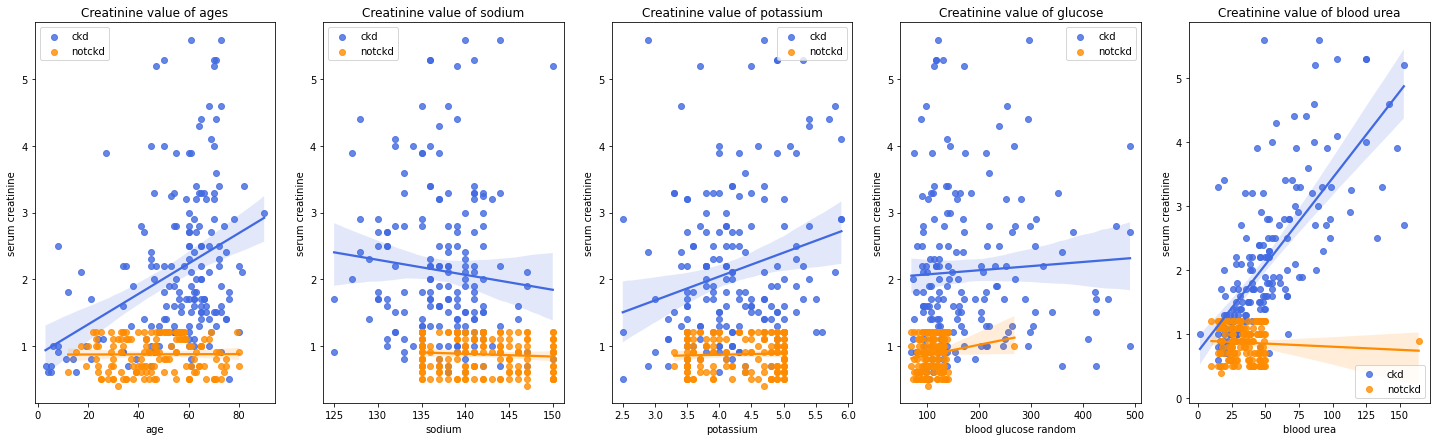

In [21]:
fig, axs = plt.subplots(1,5,figsize=(25, 7),facecolor = 'white')
colors = ['royalblue', 'darkorange']
markers = ['o', 'o']

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[0] = sns.regplot(x="age", y="serum creatinine", 
                        ax=axs[0],color=colors[i],marker=markers[i],
                        data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[0].legend(loc='best') 
axs[0].set_title("Creatinine value of ages")

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[1] = sns.regplot(x="sodium", y="serum creatinine", 
                        ax=axs[1],color=colors[i],marker=markers[i],
                        data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[1].legend(loc='best') 
axs[1].set_title("Creatinine value of sodium")

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[2] = sns.regplot(x="potassium", y="serum creatinine", 
                        ax=axs[2],color=colors[i],marker=markers[i],
                        data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[2].legend(loc='best') 
axs[2].set_title("Creatinine value of potassium")

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[3] = sns.regplot(x="blood glucose random", y="serum creatinine", 
                        ax=axs[3],color=colors[i],marker=markers[i],
                        data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[3].legend(loc='best') 
axs[3].set_title("Creatinine value of glucose")

for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
    axs[4] = sns.regplot(x="blood urea", y="serum creatinine", 
                        ax=axs[4],color=colors[i],marker=markers[i],
                        data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
    axs[4].legend(loc='best') 
axs[4].set_title("Creatinine value of blood urea")

display(fig) 
plt.close('all')



La gran mayoria que tienen creatinina baja, son personas sin CKD.
como sera el grafico los que tienen valores de creatinine bajo pero tienen ckd? <br />
quienes son los pacientes que tienen creatinia baja pero tienen CKD? <br />
quienes son los pacientes con CKD que tienen glucosa baja, igual que los normales? <br />
que relacion tendra los pacientes que tienen el glucosa alto con los que tienen que hacer dialisis? glucosa y la edad? <br />

Resultados de sangre:

Creatinina: La creatinina es un producto de desecho del metabolismo muscular y su nivel en sangre se utiliza para evaluar la función renal. En la IRC, los niveles de creatinina suelen aumentar debido a la disminución de la capacidad de los riñones para eliminarla del cuerpo.

Urea o nitrógeno ureico en sangre (BUN): La urea es otro producto de desecho que se mide en sangre para evaluar la función renal. Los niveles de BUN también tienden a aumentar en la IRC debido a la disminución del filtrado renal.

Filtrado glomerular (FG): El FG es una medida más precisa de la función renal y se puede calcular a partir de la creatinina y otros factores. En la IRC, el FG disminuirá, lo que indica una reducción en la capacidad de los riñones para filtrar la sangre.

Resultados de orina:

Proteínas en la orina: Los riñones dañados pueden permitir que las proteínas, que normalmente se deben retener en el cuerpo, se filtren en la orina. Por lo tanto, las personas con IRC pueden tener niveles elevados de proteínas en la orina, lo que se conoce como proteinuria.

Glucosa en la orina: La glucosa no debería estar presente en la orina en condiciones normales, pero en la IRC, los riñones pueden tener dificultades para reabsorber adecuadamente la glucosa, lo que resulta en glucosa en la orina.

Sangre en la orina: La presencia de sangre en la orina, conocida como hematuria, puede ocurrir en la IRC debido a daños en los pequeños vasos sanguíneos de los riñones.

In [ ]:
# fig, ax = plt.subplots(1,1,figsize=(20, 10),facecolor = 'white')
# for i, value in enumerate(ckd_cleaned_df["classification"].unique()):
#     ax = sns.regplot(x="blood urea", y="blood glucose random",
#                         ax=ax,color=colors[i],marker=markers[i],
#                         data=ckd_cleaned_df[ckd_cleaned_df.classification == value],label=value)
#     ax.legend(loc='best') 
# ax.set_title("Creatinine value of glucose")

# display(fig) 
# plt.close('all')

### 6. Data engineering


### 7. Suitable algorithm selection
    Model: Supervised learning
     - Regression
     - Classification: decision trees, logistic regression, KNN


### 8. Algorithm development (Model validation, Model Deployment)


### 9. Interpretation